# Python ML Classification Project Loan applicant’s risk classification KNN

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cd D:\Data Science\Project\P7

D:\Data Science\Project\P7


In [9]:
df=pd.read_excel("Python_Project_7_KNN.xlsx")

# Part-1: Data Exploration and Pre-processing

## 1) load the given dataset

In [10]:
df.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1


## 2) Check for the null values

In [15]:
df.isnull().sum()

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

## 3) Get basic information from data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


## 4) Describe the dataset

In [16]:
df.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


## 5) Display scatterplot between age & Total work Experience

Text(0.5, 1.0, 'Age vs Total Work Experience')

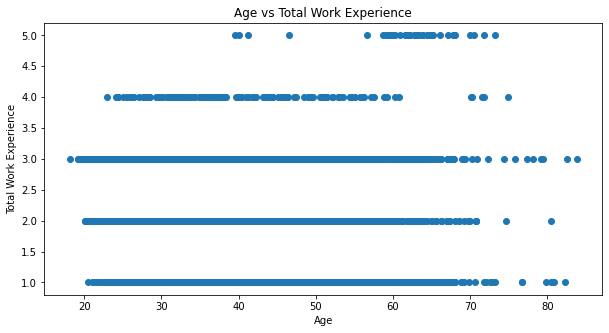

In [42]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Age'],df['Total Work Experience'])
plt.xlabel("Age")
plt.ylabel("Total Work Experience")
plt.title("Age vs Total Work Experience")

## 6) Display box plot for age

{'whiskers': [<matplotlib.lines.Line2D at 0x1c91dc9c730>,
 'caps': [<matplotlib.lines.Line2D at 0x1c91dc9c250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c91dce1eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c91dc9c400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c91dd0a7c0>],
 'means': []}

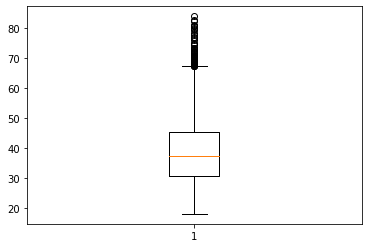

In [46]:
plt.boxplot(df['Age'])

## 7) Display box plot for Cibil score

{'whiskers': [<matplotlib.lines.Line2D at 0x1c91dcf64c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c91dcf61f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c91dcf6250>],
 'medians': [<matplotlib.lines.Line2D at 0x1c91dcd7970>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c91dcd76a0>],
 'means': []}

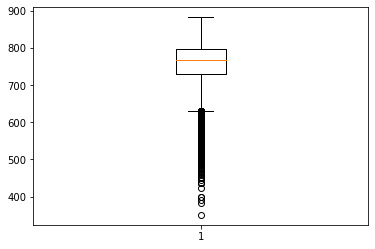

In [48]:
plt.boxplot(df['Cibil score'])

## 8) Create target and features data where target is Total bounces past12months

In [54]:
fd=df.drop('Total bounces past12months',axis=1)
fd.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months
0,40.50,2,6,0.842666,594,0
1,41.25,5,2,0.791667,754,0
2,39.50,5,2,0.727273,779,0
3,35.00,1,4,0.820232,818,0
4,34.00,3,3,0.455581,853,0


In [55]:
td=df['Total bounces past12months']
td.head()

0    0
1    0
2    0
3    0
4    1
Name: Total bounces past12months, dtype: int64

# Part-2: Working with Model

## 1) Split data into training and testing sets

In [60]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test=train_test_split(fd,td,test_size=0.2,random_state=42)

In [69]:
x_train.shape

(7196, 6)

In [71]:
x_test.shape

(1799, 6)

In [70]:
y_test.shape

(1799,)

## 2) Create a KNN classifier between Features and target data

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn_model=KNeighborsClassifier(1)

knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

## 3) Display the test score &&  4) Display the training score

In [77]:
knn_model.score(x_train,y_train)

1.0

In [78]:
knn_model.score(x_test,y_test)

0.546414674819344

## 5) Print the accuracy score

In [87]:
from sklearn.metrics import accuracy_score

y_prd=knn_model.predict(x_test)
y_prd

accuracy=accuracy_score(y_test,y_prd)
print("Accuracy Score:",accuracy)

Accuracy Score: 0.546414674819344


## 6) Try 1 to 14 k values for classifier

In [90]:
test_score=[]
train_score=[]

for i in range(1,14):
    knn_model=KNeighborsClassifier(i)
    knn_model.fit(x_train,y_train)
    
    train_score.append(knn_model.score(x_train,y_train))
    test_score.append(knn_model.score(x_test,y_test))
    


## 7) Display training and testing score for all the 1 to 14 k values

In [91]:
print("Training Score:",train_score)
print("Testing Score:",test_score)

Training Score: [1.0, 0.74082823790995, 0.7066425792106726, 0.6862145636464703, 0.6787103946637021, 0.6681489716509171, 0.6628682601445247, 0.6607837687604224, 0.6574485825458588, 0.656058921623124, 0.6546692607003891, 0.6541133963312952, 0.6545302946081156]
Testing Score: [0.546414674819344, 0.6259032795997777, 0.6270150083379655, 0.6370205669816564, 0.6470261256253474, 0.6531406336853808, 0.6498054474708171, 0.6542523624235687, 0.6559199555308505, 0.6592551417454141, 0.6592551417454141, 0.6592551417454141, 0.6592551417454141]


In [97]:
#plt.figure(figsize=(12,5))
#p = sns.lineplot(range(1,14),train_score,marker='*',label='Train Score')
#p = sns.lineplot(range(1,14),test_score,marker='o',label='Test Score')

In [94]:
knn_model=KNeighborsClassifier(3)

knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [95]:
knn_model.score(x_train,y_train)

0.7066425792106726

In [96]:
knn_model.score(x_test,y_test)

0.6270150083379655